In [80]:
%matplotlib widget
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [81]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [83]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [85]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

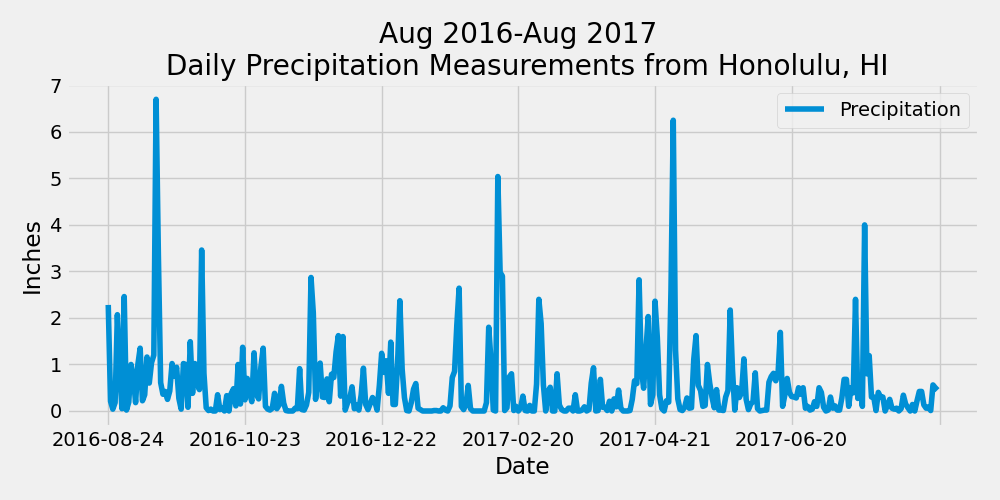

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)- dt.timedelta(days = 365)
last_year

# Perform a query to retrieve the date and precipitation scores
year_data = session.query(measurement.date,func.max(measurement.prcp))\
    .filter(func.strftime('%Y-%m-%d',measurement.date) > last_year)\
    .group_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_data, columns=['Date','Precipitation'])

# Sort the dataframe by date
df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date',inplace=True)
plt.rcParams['figure.figsize'] = (10,5)
df.plot(xticks = (0,60,120,180,240,300,365))
plt.ylabel('Inches')
plt.title('Aug 2016-Aug 2017 \n Daily Precipitation Measurements from Honolulu, HI' )
plt.tight_layout()

In [90]:
precipitation_data = session.query(measurement.date,measurement.prcp)\
    .filter((measurement.date) > last_year).all()

prec_df = pd.DataFrame(precipitation_data,columns = ['Date','Precipitation'])
prec_df.dropna()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2216,2017-08-17,0.13
2218,2017-08-19,0.09
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [91]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = session.query(station).count()
num_of_stations

9

In [93]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station))\
    .group_by(measurement.station)\
        .order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel =[measurement.station,
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]

most_active_station = session.query(*sel).\
filter(measurement.station == 'USC00519281').all()

most_active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

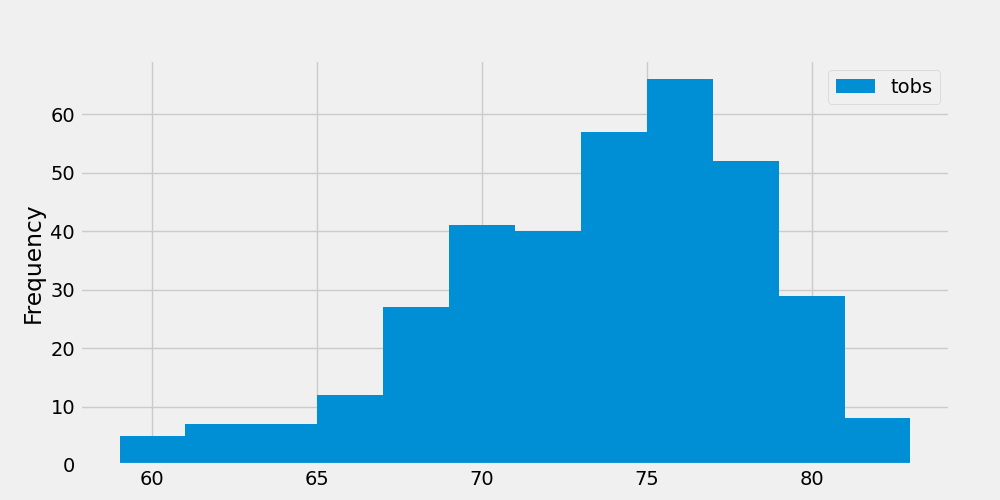

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
last_12_months = session.query(measurement.tobs)\
.filter(func.strftime(measurement.date) > last_year)\
.filter(measurement.station == 'USC00519281').all()

# plot the results as a histogram
temp_df = pd.DataFrame(last_12_months,columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.show()

# Close Session

In [30]:
# Close Session
session.close()